![DSA log](dsalogo.png)

### Instructions

1. Make sure you are using a version of notebook greater than v.3. If you installed Anaconda with python 3 - this is likely to be fine. The next piece of code will check if you have the right version.
2. The notebook has both some open test cases that you can use to test the functionality of your code - however it will be run on another set of test cases that you can't from which marks will be awarded. So passing all the tests in this notebook is not a guarantee that you have done things correctly - though its highly probable.
3. Also make sure you submit a notebook that doesn't return any errors. One way to ensure this is to run all the cells before you submit the notebook.
4. When you are done create a zip file of your notebook and upload that
5. For each cell where you see "YOUR CODE HERE" delete the return notImplemented statement when you write your code there - don't leave it in the notebook.
6. Once you are done, you are done.

# DSA 2018 Nyeri Preparatory Notebook

Billy Okal

In preparation for DSA 2018 Nyeri, we would like potential participants to complete a number of exercises in probability, machine learning and programming to ensure that they have the necessary prerequisite knowledge to attend the summer school. You will be required to submit notebooks with solutions to these exercises during the application process.

In this exercise we will practise basic preparation techniques as concerns storage of data and models. This is a crucial process present in every data science project. As the project evolves, data may be manipulated and different model versions produced. These need to be tracked so as to maintain reproducibility, a crucial element of data science.

There are many options for data and model storage in Python. In this exercise, we focus on elementary techniques requiring no more that the standard library. These ought to be applicable to even the smallest data science projects such as homeworks or course projects.

This exercise is split into two parts, which should be completed in order. These mimic a typical workflow across a project's lifetime.

In [1]:
# Load some common libraries used here
import csv
import json
import pickle
import numpy as np
from matplotlib import pyplot as plt

---
## Part I: Data Preparation and Exploration

In this part, we will load a dataset provided with this exercise, prepare it by converting to the right types and finally plot it to explore the data.

The dataset is stored in a CSV file with the following columns;
[feature_1,feature_2,label] 
The values in each line are separated by a comma (',').

### Using the libraries above write a function to read the dataset.

The filename specified below. The final dataset should be a numpy array.

In [2]:
ORIGINAL_NAME = 'dataset_original.csv'

In [3]:
def load_data(filename):
    """ Load dataset from a CSV file.
    
    Parameters
    -----------
    filename : str
        The filename of the CSV.
    
    Returns
    --------
    data : array-like
        Numpy array of the loaded data.
        
    Note
    -----
    Hints
    1) Pay attention to the header (column names) when creating the array.
    2) Pay attention to types read in (strings vs floats)
    
    """
    feature_1 = []
    feature_2 = []
    label = []
    with open(filename, 'r') as f :
        lines =f.readlines()
        for line in lines[1:]:
            values = line.split(',')
            feature_1.append(float(values[0]))
            feature_2.append(float(values[1]))
            label.append(int(values[2].replace('\n', '')))
    return np.stack((np.array(feature_1), np.array(feature_2), np.array(label, dtype=np.int0)), axis=1)

In [4]:
data = load_data(ORIGINAL_NAME)

In [5]:
# Check your implementation against these basic tests
assert len(data) == 1000
assert data.shape == (1000, 3)
### BEGIN HIDDEN_TESTS
assert np.unique(data[:, 2]).tolist() == [0, 1]
### END HIDDEN_TESTS

### Now we explore the data by plotting it. 

Please use the following function.

In [6]:
def plot_dataset(data):
    """ Plot a simple dataset """
    plt.scatter(data[:, 0], data[:, 1], marker='o', c=data[:, 2], s=25, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

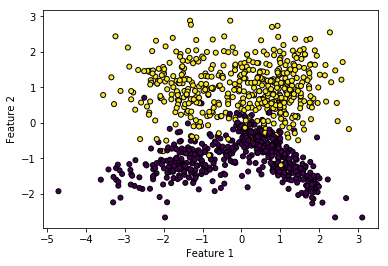

In [7]:
plot_dataset(data)

---
## Part II Post-processing Data

In this part, we will modify the dataset. We make the assumption that there is some noise in the data define by the following rules:
* Feature 1 should have values in the range $(-2, 2]$
* Feature 2 should have values in the range $[-3, 1.5)$

In practise, such rules are derived from domain knowledge from the area of interest. We will now filter the data and remove the 'noisy' samples (any sample which does not fall within ranges specified above). We also save the resulting dataset for future use.

### Filter the data

Implement a filter that uses the rules above to create a new dataset.

In [8]:
def filter_data(data):
    """ Filter dataset by removing samples which do not match the rules 
    
    Parameters
    -----------
    data : array-like
        Dataset
    Returns
    -------
    new_data : array-like
        New dataset
    """
    first_cond = np.logical_and(data[:, 0]> -2 , data[:, 0] <= 2 ) 
    secnd_cond = np.logical_and(data[:, 1]> -3 , data[:, 1] <= 1.5)
    cond = first_cond & secnd_cond
    return data[cond]

In [9]:
# Execute the filter call
new_data = filter_data(data)

In [10]:
# Test your implementation against the following.
assert new_data.shape[0] == 804
### BEGIN HIDDEN_TESTS
assert (new_data[:, 0] > 2).all() == False
assert (new_data[:, 0] < -2).all() == False
assert (new_data[:, 1] < -3).all() == False
assert (new_data[:, 1] > 1.5).all() == False
### END HIDDEN_TESTS

Now write a function to save the new dataset into a CSV file, with the specified name.

In [11]:
NEW_FILE_NAME = 'dataset_clipped.csv'

In [12]:
def save_dataset(new_data, NEW_FILE_NAME):
    return np.savetxt(NEW_FILE_NAME, new_data, delimiter=",")

In [13]:
# Run the function to save the dataset
save_dataset(new_data, NEW_FILE_NAME)

We are done! Hurray. Let us summarized what we have accomplished.

- Reading data from CSV files
    - Preparing the data by converting to appropriate types, removing headers
- Exploration by visualizing the data
- Post processing the data by removing samples that do not match a specified criteria.
- Saving the new dataset as a CSV file. 

We are now ready to take the new dataset and start doing further analysis and/or model fitting.